In [4]:
%matplotlib inline 

In [5]:
import sys
sys.path.insert(0, "../script/")
sys.path.insert(0, "../cluster/")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import seaborn as sns
sns.set(color_codes=True)
from sklearn import linear_model
import numpy as np

ImportError: No module named seaborn

In [6]:
sitelist = ["asp", "douban", "stackexchange", "tripadvisor","youtube"]
feat_dict = {}
for site in sitelist:
    feat_dict[site] = []
    with open("./May1/feature/" + site + "/log_tf_idf.txt") as fin:
    #with open("./crawling/May1/feature/"+ site +"/log_tf_idf.txt") as fin:
        for line in fin:
            _, vector = line.strip().split(':')
            vector = [float(x) for x in vector.split()]
            feat_dict[site].append(vector)
    feat_dict[site] = np.asarray(feat_dict[site])

number of feats  403
2 0.275788677886
6 0.257343201208
12 0.140934918889
17 0.256718397093
18 0.384187671841
24 0.111241083728
42 0.39469743294
43 0.39469743294
60 0.180560569931
63 0.191312962992
66 0.191312962992
69 0.203169324238
70 0.587951777632
71 0.275788677886
72 0.295178571105
73 0.443175163319
74 0.227801747765
75 0.227801747765
76 0.227801747765
77 0.922871316781
78 0.276698726507
106 0.414857417362
118 0.414857417362
126 0.339972849646
127 0.36223269343
128 0.265821355892
146 0.126542229764
167 0.103997474474
240 0.109929435016
335 0.903810447314
336 0.903810447314
378 0.313082975006
379 0.313320635985
398 0.125688580549
536 0.107915566299
538 0.103999791222
541 0.18958901729
567 0.11068808215
599 0.103159400194
604 0.269042700279
605 0.129451470776
606 0.131038782961
607 0.268884759257
608 0.366216197397
616 0.192040682713
626 0.104820862913
630 0.323441044046
698 0.193578642073
699 0.127612531828
700 0.26802779886
702 0.191399993103
709 0.173615561813
735 0.10886730794
74

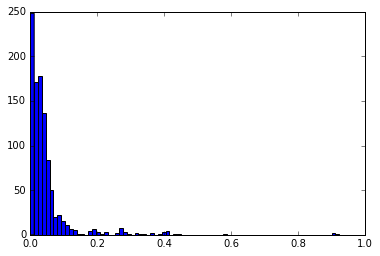

0.138430697517


In [7]:
site="douban"
X = feat_dict[site]

X = normalize(X, norm='l1')
num_feat = len(X[0])
print "number of feats ", num_feat

K = 100
kdist_list = []
nbrs = NearestNeighbors(n_neighbors=K, algorithm="ball_tree").fit(X)
distances, indices = nbrs.kneighbors(X)
for dist in distances:
    kdist_list += dist.tolist()[4:5]


for index, value in enumerate(kdist_list):
    if value > 0.10:
        print index, value

num_bins = int(num_feat/5)
print num_bins, "num_bins"
n, bins, _ = plt.hist(kdist_list, bins=num_bins)
line1 = plt.plot(4,color="r",label="question_tf-idf")

print bins
print n
# plt.yscale('log')
plt.show()

y = np.array([np.log(x) if x > 0 else 0 for x in n])
x = np.array(bins[1:]).reshape(-1, 1)
threshold = np.mean(n[100/3:])
threshold = 4


for idx, val in enumerate(n):
    if val < threshold and idx > 5:
        eps = bins[idx]
        break
print eps

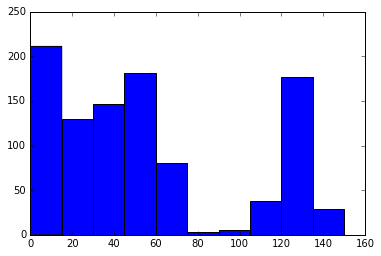

array([   0.,   15.,   30.,   45.,   60.,   75.,   90.,  105.,  120.,
        135.,  150.])

In [8]:
nbrs = NearestNeighbors(radius=eps, algorithm="ball_tree").fit(X)
distances, indices = nbrs.radius_neighbors(X, radius=eps)
nbr_num_list = []
for ind in indices:
    nbr_num_list.append(len(ind) - 1)
n, bins, _ = plt.hist(nbr_num_list, bins=10)
plt.show()
bins